# Load the data



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# load clean dataset

df= pd.read_csv('../data/Cleaned_Aircraft_Noise_Night_SFO.csv')

/var/folders/wx/0m6_v4n9285892l822ksy8740000gn/T/ipykernel_83035/367111575.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('../data/Cleaned_Aircraft_Noise_Night_SFO.csv')


In [24]:
# inspect dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693366 entries, 0 to 1693365
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   disturbance_date_time  object 
 1   reporter_city          object 
 2   reporter_postal_code   object 
 3   aircraft_pca_altitude  float64
 4   airport_id             object 
 5   operation_type         object 
 6   aircraft_type          object 
 7   hour                   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 103.4+ MB


# Summary statistics

In [ ]:
print("\nNumeric Summary (aircraft_pca_altitude):\n", df['aircraft_pca_altitude'].describe())

print("\nOperation type counts:\n", df['operation_type'].value_counts())
print("\nAircraft type counts:\n", df['aircraft_type'].value_counts())
print("\nReporter city counts:\n", df['reporter_city'].value_counts())



Numeric Summary (aircraft_pca_altitude):
 count    1.692925e+06
mean     6.528933e+03
std      3.080461e+03
min     -5.710000e+02
25%      4.636000e+03
50%      5.764000e+03
75%      8.773000e+03
max      1.959000e+04
Name: aircraft_pca_altitude, dtype: float64

Categorical Summary:

Operation type counts:
 operation_type
A    1481905
D     211461
Name: count, dtype: int64

Aircraft type counts:
 aircraft_type
B738     216962
A320     187148
E75L     179861
B739     156931
B77W     102614
          ...  
B735          1
AS350         1
PA32          1
C82R          1
C55B          1
Name: count, Length: 195, dtype: int64

Reporter city counts:
 reporter_city
Palo Alto         447932
Portola Valley    226316
Santa Cruz        177125
Los Altos         176398
Scotts Valley      82032
                   ...  
Piedmont               1
Sf                     1
Brookdale              1
Colma                  1
Walnut Creek           1
Name: count, Length: 73, dtype: int64


The dataset contains 1,692,925 nighttime aircraft noise reports at SFO.

Numeric Variable (aircraft_pca_altitude):

Altitudes range from -571 ft to 19,590 ft, with a mean of 6,528 ft and a standard deviation of 3,080 ft.

The median altitude is 5,764 ft, with the 25th and 75th percentiles at 4,636 ft and 8,773 ft, respectively.

Negative altitude values are anomalies that may need to be removed for modeling.

Categorical Variables: 

Operation Type: Most reports are arrivals (A, 1,481,905 reports) compared to departures (D, 211,461 reports).

Aircraft Type: The most common types are B738, A320, and E75L. Many rare types appear only once.

Reporter City: Reports come from numerous cities, with a long tail of cities having very few reports (e.g., Brookdale, Colma, Walnut Creek).

# Visualize Distributiions

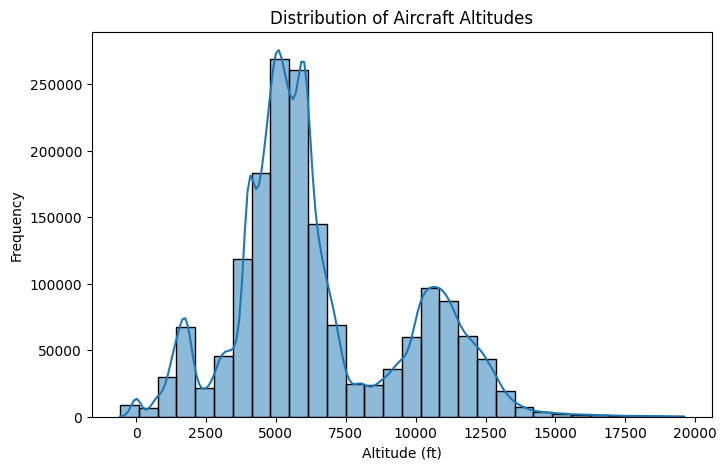

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['aircraft_pca_altitude'], bins=30, kde=True)
plt.title('Distribution of Aircraft Altitudes')
plt.xlabel('Altitude (ft)')
plt.ylabel('Frequency')
plt.show()

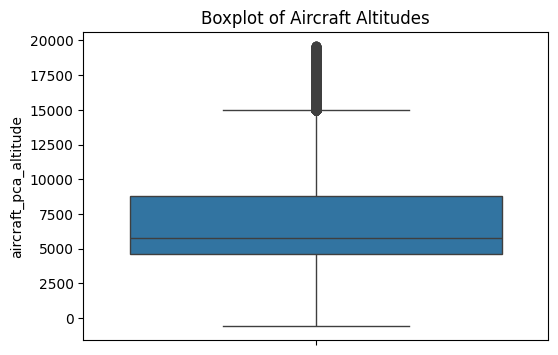

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['aircraft_pca_altitude'])
plt.title('Boxplot of Aircraft Altitudes')
plt.show()


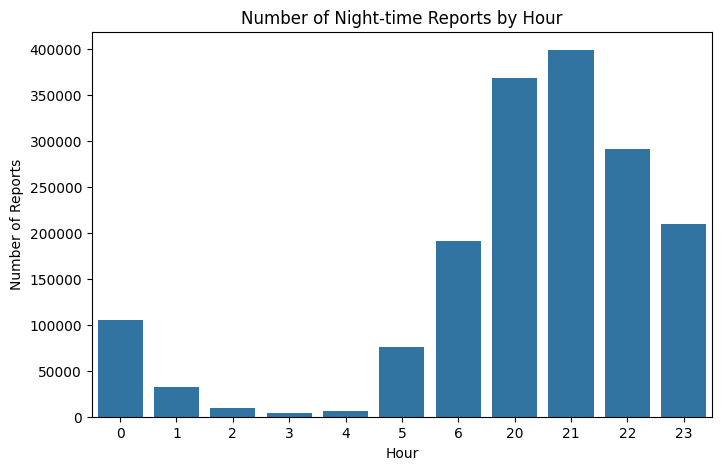

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='hour',data=df)
plt.title('Number of Night-time Reports by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Reports')
plt.show()

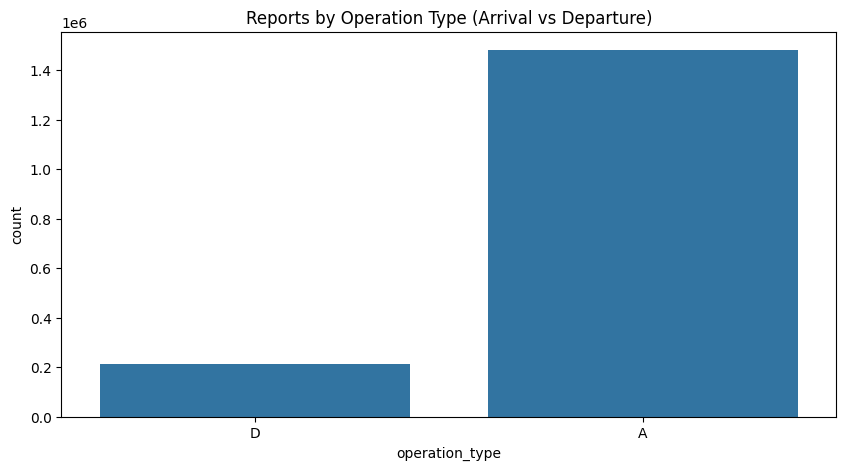

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='operation_type', data=df)
plt.title('Reports by Operation Type (Arrival vs Departure)')
plt.show()

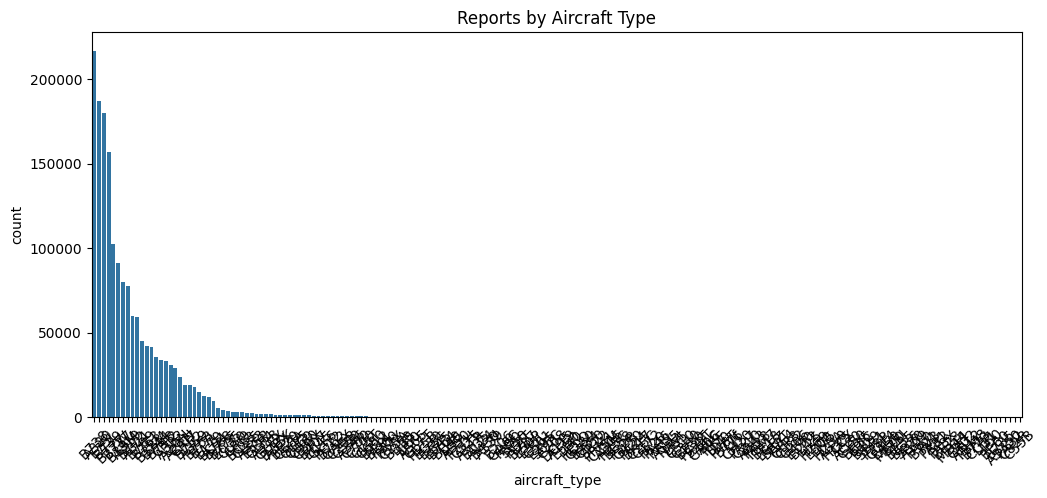

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x='aircraft_type', data=df, order=df['aircraft_type'].value_counts().index)
plt.title('Reports by Aircraft Type')
plt.xticks(rotation=45)
plt.show()

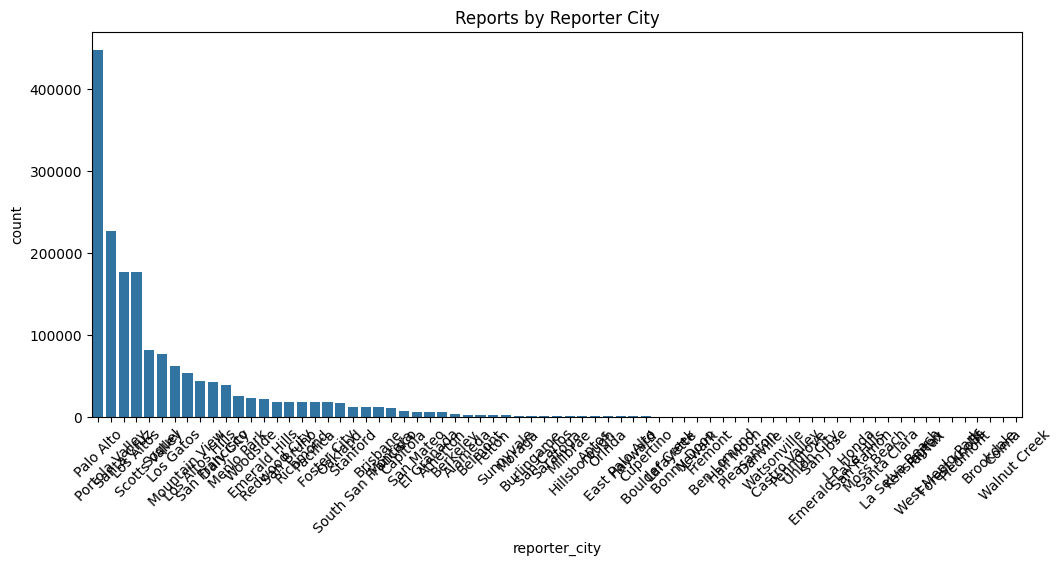

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x='reporter_city', data=df, order=df['reporter_city'].value_counts().index)
plt.title('Reports by Reporter City')
plt.xticks(rotation=45)
plt.show()

# Relationships

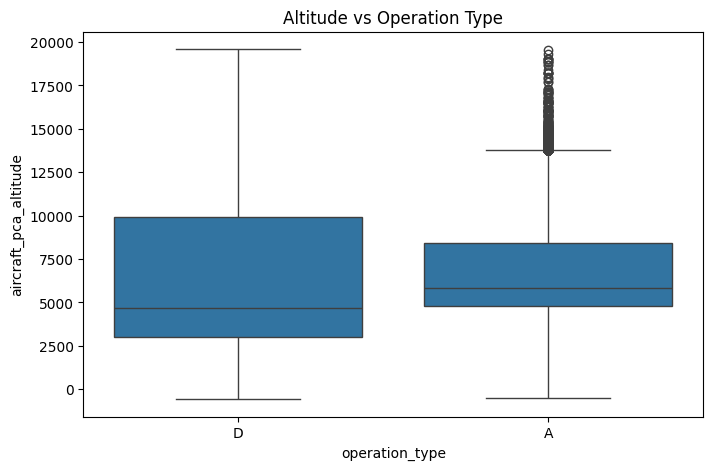

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='operation_type', y='aircraft_pca_altitude', data=df)
plt.title('Altitude vs Operation Type')
plt.show()


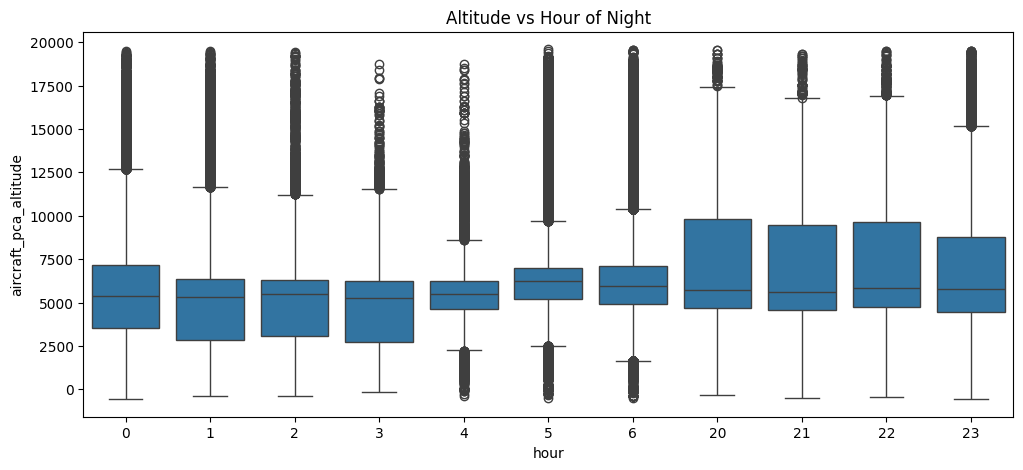

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='aircraft_pca_altitude', data=df)
plt.title('Altitude vs Hour of Night')
plt.show()


Correlation matrix:
                        aircraft_pca_altitude      hour
aircraft_pca_altitude               1.000000  0.067986
hour                                0.067986  1.000000


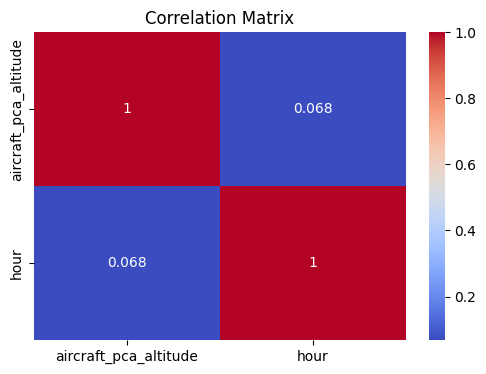

In [23]:
# Step 5: Correlation (only numeric columns)

numeric_cols = ['aircraft_pca_altitude', 'hour']
corr = df[numeric_cols].corr()
print("\nCorrelation matrix:\n", corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
